### **Movie Recommendation System**
Beldina Kinyua

## Imports and Data Loading

In [161]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [162]:
data = pd.read_csv("netflix_data.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Cleaning and Preprocessing

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [164]:
data.shape

(8807, 12)

In [165]:
#Created a copy of the original dataframe
df = data.copy()

In [166]:
# Keep only relevant columns
df = df[['title', 'listed_in', 'description']].dropna()
df.head()

,title,listed_in,description
0,Dick Johnson Is Dead,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [167]:
# Combine genres and description into one text column
df['text'] = df['listed_in'] + " " + df['description']
df.head()


,title,listed_in,description,text
0,Dick Johnson Is Dead,Documentaries,"As her father nears the end of his life, filmm...",Documentaries As her father nears the end of h...
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysterie..."
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act..."
3,Jailbirds New Orleans,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV Feuds, flirtations and ..."
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ..."


# Feature Extraction 

In [168]:
# Vectorize the combined text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])

print("TF-IDF shape:", X.shape)


TF-IDF shape: (8807, 5000)


In [169]:
# Reduce dimensionality of TF-IDF features using PCA
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X.toarray())
print("Reduced shape:", X_pca.shape)


Reduced shape: (8807, 50)


In [170]:
# Cluster movies using KMeans on PCA-reduced features
kmeans = KMeans(n_clusters=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)

df['cluster'].value_counts()


cluster
8    1928
9    1654
4    1233
7    1157
5     654
0     562
1     546
2     459
6     400
3     214
Name: count, dtype: int64

# Data Visualizations

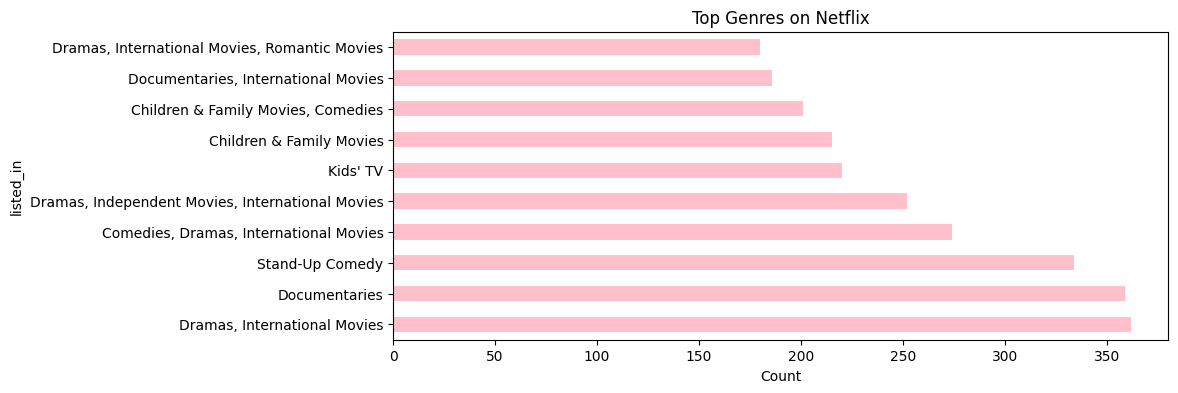

In [171]:
plt.figure(figsize=(10,4))
df['listed_in'].value_counts().head(10).plot(kind='barh', color='pink')
plt.title('Top Genres on Netflix')
plt.xlabel('Count')
plt.show()

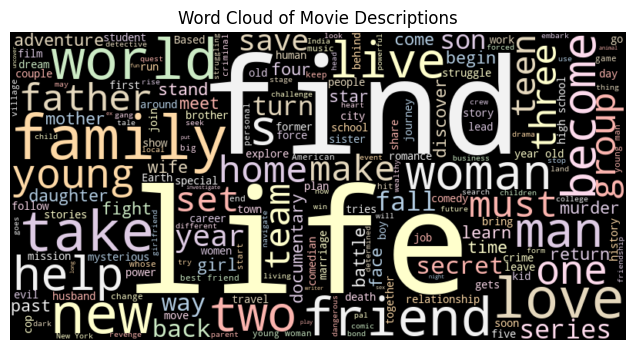

In [181]:
# Combine all descriptions into one string
text = " ".join(df['description'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(text)

plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions')
plt.show()

C:\Users\kinyu\AppData\Local\Temp\ipykernel_500\3496101898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='pastel')


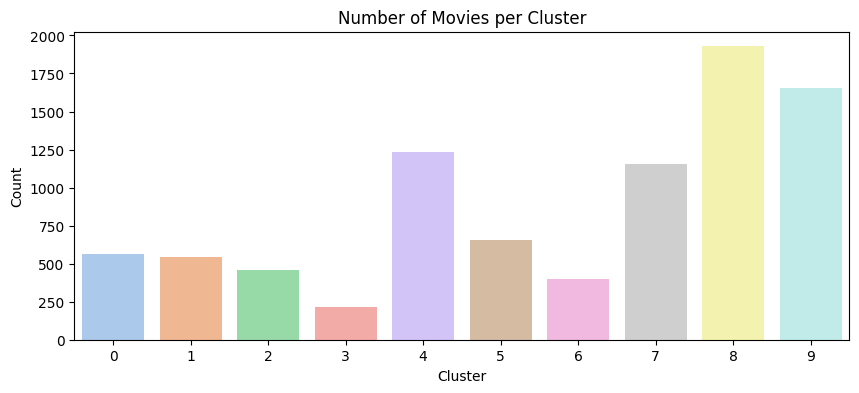

In [182]:
# Distribution of movies per cluster
plt.figure(figsize=(10,4))
sns.countplot(x='cluster', data=df, palette='pastel')
plt.title('Number of Movies per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

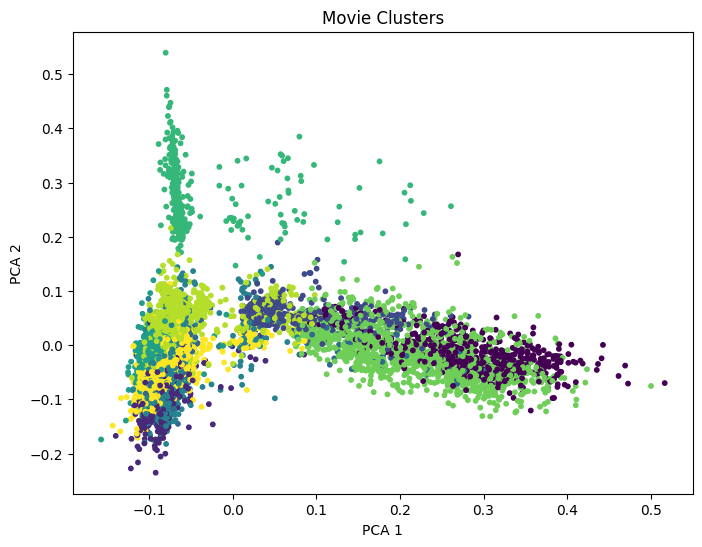

In [174]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='viridis', s=10)
plt.title("Movie Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Recommendation Function

In [183]:
def recommend_movie(title, n=5):
    if title not in df['title'].values:
        return "Movie not found in dataset."

    # Find movie index and cluster
    idx = df[df['title'] == title].index[0]
    movie_cluster = df.loc[idx, 'cluster']
    
    # Get all movies in the same cluster
    cluster_movies = df[df['cluster'] == movie_cluster]
    cluster_indices = cluster_movies.index
    
    # Compute cosine similarity between the movie and others in the cluster
    sim = cosine_similarity(X[idx], X[cluster_indices]).flatten()
    
    # Sort and pick top similar movies (excluding itself)
    similar_indices = cluster_indices[sim.argsort()[-n-1:-1][::-1]]
    
    return df.loc[similar_indices, ['title', 'listed_in', 'description']]

# Example
recommend_movie("Squid Game")


,title,listed_in,description
3684,Kakegurui,"International TV Shows, TV Dramas, TV Thrillers",Yumeko Jabami enrolls at Hyakkaou Private Acad...
2827,The Circle Brazil,"International TV Shows, Reality TV",Be yourself or someone else? In this fun reali...
1562,Alice in Borderland,"International TV Shows, TV Action & Adventure,...",An aimless gamer and his two friends find them...
1044,High-Rise Invasion,"Anime Series, International TV Shows, TV Thril...",High schooler Yuri finds herself atop a skyscr...
7538,My Hotter Half,"British TV Shows, International TV Shows, Real...",Couples compete to see who can take the sexies...
